In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

import os

Using TensorFlow backend.
/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Aswin_S

In [2]:
path = os.path.join( os.getcwd(), '..' )
model_save_path = path + '/Model Archive/'
results_save_path = path + '/Results/'

In [3]:
print(path)
print(model_save_path)
print(results_save_path)

/Users/Aswin_Shriram_T/Documents/Northeastern University/Semester 1/Foundations of AI CS5100/Project/Project_Files/FAI Project/DQN_MCD/Code/..
/Users/Aswin_Shriram_T/Documents/Northeastern University/Semester 1/Foundations of AI CS5100/Project/Project_Files/FAI Project/DQN_MCD/Code/../Model Archive/
/Users/Aswin_Shriram_T/Documents/Northeastern University/Semester 1/Foundations of AI CS5100/Project/Project_Files/FAI Project/DQN_MCD/Code/../Results/


In [8]:
ENV_NAME = 'MountainCar-v0'

In [ ]:
# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

In [ ]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=1000000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=100,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae', 'mse'])

In [ ]:
# from rl import callbacks

In [ ]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
# dqn.fit(env, nb_steps=100000, visualize=False, callbacks=[callbacks.FileLogger(results_save_path+'dqn_{}_train.txt'.format(ENV_NAME))], verbose=2)

In [ ]:
# After training is done, we save the final weights.
# dqn.save_weights(results_save_path+'dqn_{}_weights.h5'.format(ENV_NAME), overwrite=True)

In [ ]:
dqn.load_weights(model_save_path + 'dqn_{}_weights.h5'.format(ENV_NAME))

In [ ]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder

In [ ]:
def video_saver(filename, agent=dqn, env=env, num_epi=5, path_save = results_save_path+'Videos/'):
    rec = VideoRecorder(env, path = path_save+filename, enabled=True)
    rec.capture_frame()
    for i_episode in range(num_epi):
        rec.capture_frame()
        observation = env.reset()
        for t in range(1000):
            env.render()
            #print(observation)
            #action = agent.actor.predict(observation.reshape(1,1,env.observation_space.shape[0]))
            action = agent.model.predict(observation.reshape(1,1,env.observation_space.shape[0]))
            #print(action)
            observation, reward, done, info = env.step(np.argmax(action))
            rec.capture_frame()
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                print("Reward at the end of episode {} :".format(i_episode+1), reward)
                break
    rec.close()
    env.close()

In [ ]:
video_saver('dqn_{}_results_test.mp4'.format(ENV_NAME))

In [ ]:
# Finally, evaluate our algorithm for 5 episodes.
history = dqn.test(env, nb_episodes=100, verbose = 2, visualize=False)

In [4]:
import pandas as pd

In [ ]:
# pd.DataFrame(history.history).to_csv(results_save_path + 'ddpg_{}_results_test.csv'.format(ENV_NAME))

In [5]:
import json

In [6]:
import matplotlib.pyplot as plt

In [9]:
model_results = json.load(open(results_save_path+'dqn_{}_train.txt'.format(ENV_NAME)))

In [10]:
type(model_results)

dict

In [11]:
model_results_df = pd.DataFrame(model_results)
analyze_df = model_results_df.copy()
analyze_df['episode'] +=1
analyze_df['avg_reward_per_episode-step'] = analyze_df['episode_reward']/analyze_df['nb_episode_steps']

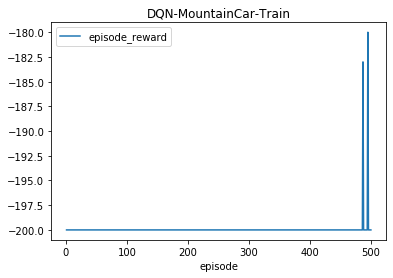

In [15]:
analyze_df.set_index(['episode'])[['episode_reward']].plot()
plt.title('DQN-MountainCar-Train')
plt.savefig(results_save_path+'train_rewards.png', dpi=400, bbox_inches='tight')

In [23]:
test_df = pd.read_csv(results_save_path+'ddpg_MountainCar-v0_results_test.csv')
test_df['Unnamed: 0'] +=1
test_df.columns = ['episode', 'episode_reward', 'nb_steps']

In [24]:
test_df.columns

Index(['episode', 'episode_reward', 'nb_steps'], dtype='object')

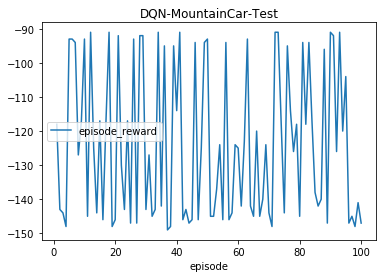

In [25]:
test_df.set_index(['episode'])[['episode_reward']].plot()
plt.title('DQN-MountainCar-Test')
plt.savefig(results_save_path+'test_rewards.png', dpi=400, bbox_inches='tight')